In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")  # or "cp1252"
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## EDA

In [3]:
df.shape

(1303, 13)

In [4]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<Axes: xlabel='Company'>

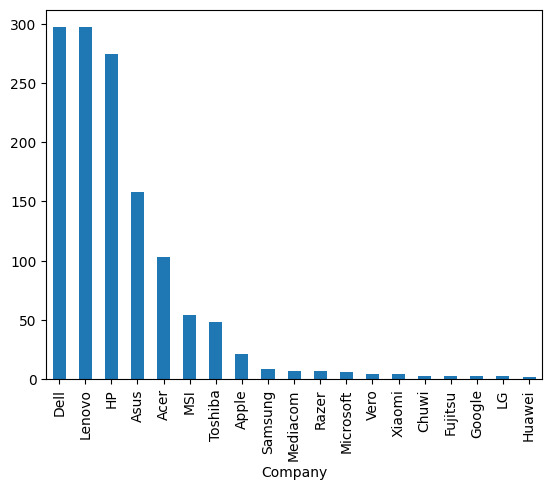

In [10]:
df["Company"].value_counts().plot(kind='bar')

In [11]:
df["Weight"]=df["Weight"].str.replace("kg","").astype("float")

In [12]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

<Axes: xlabel='Price_euros', ylabel='Count'>

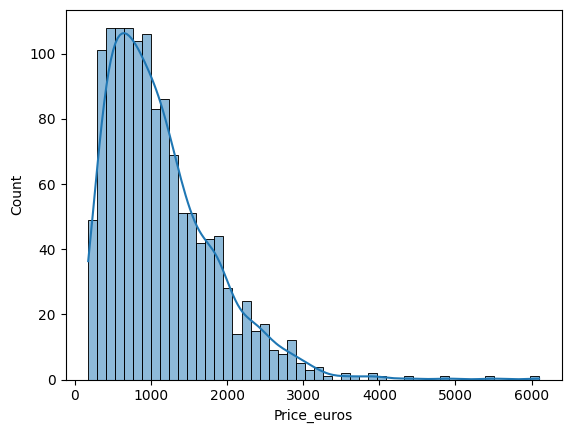

In [13]:
sns.histplot(df["Price_euros"],bins=50,kde=True)

<Axes: ylabel='Price_euros'>

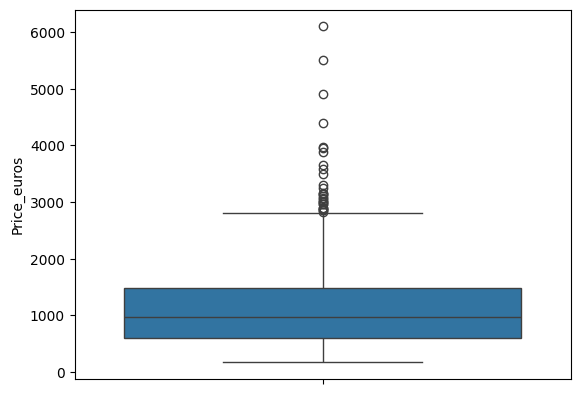

In [14]:
sns.boxplot(df['Price_euros'])

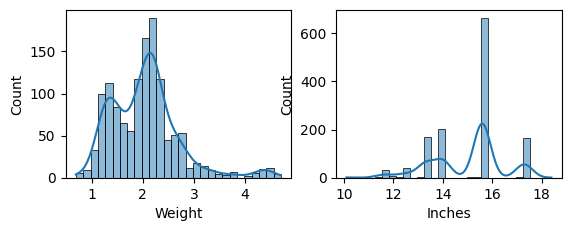

In [15]:
def plotting(var,num):
	plt.subplot(2,2,num)
	sns.histplot(df[var],kde=True)

plotting('Weight',1)
plotting('Inches',2)


<Axes: xlabel='count', ylabel='Company'>

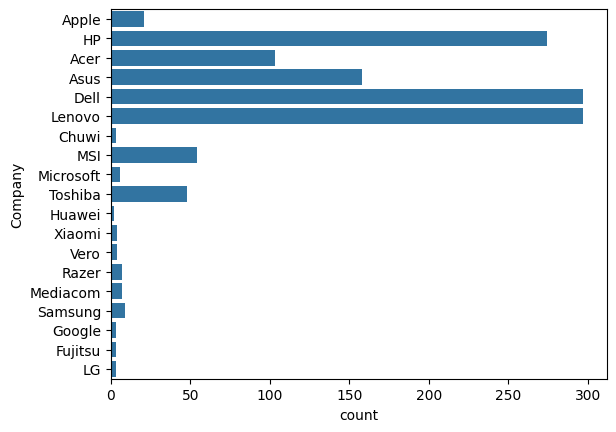

In [16]:
sns.countplot(y=df['Company'])

<Axes: >

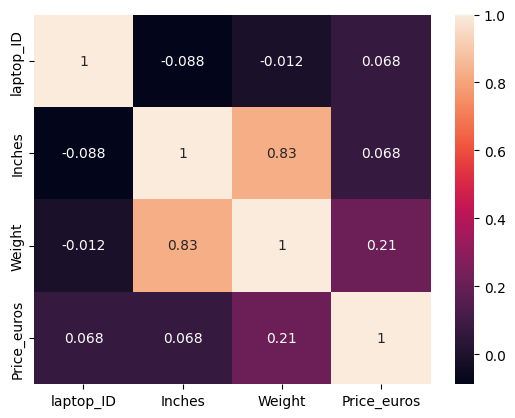

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [18]:
import sheryanalysis as sh
sh.analyze(df)



🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (1303, 13)
🧱 Columns: ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']

✅ No null values found

🔠 Categorical Columns: ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory', 'OpSys']

🔢 Numerical Columns: ['laptop_ID', 'Weight', 'Price_euros']

📝 Text Columns: ['Product', 'Cpu', 'Gpu']


{'shape': (1303, 13),
 'columns': ['laptop_ID',
  'Company',
  'Product',
  'TypeName',
  'Inches',
  'ScreenResolution',
  'Cpu',
  'Ram',
  'Memory',
  'Gpu',
  'OpSys',
  'Weight',
  'Price_euros'],
 'dtypes': {'laptop_ID': dtype('int64'),
  'Company': dtype('O'),
  'Product': dtype('O'),
  'TypeName': dtype('O'),
  'Inches': dtype('float64'),
  'ScreenResolution': dtype('O'),
  'Cpu': dtype('O'),
  'Ram': dtype('O'),
  'Memory': dtype('O'),
  'Gpu': dtype('O'),
  'OpSys': dtype('O'),
  'Weight': dtype('float64'),
  'Price_euros': dtype('float64')},
 'null_counts': {'laptop_ID': 0,
  'Company': 0,
  'Product': 0,
  'TypeName': 0,
  'Inches': 0,
  'ScreenResolution': 0,
  'Cpu': 0,
  'Ram': 0,
  'Memory': 0,
  'Gpu': 0,
  'OpSys': 0,
  'Weight': 0,
  'Price_euros': 0},
 'total_rows': 1303,
 'column_types': {'categorical': ['Company',
   'TypeName',
   'Inches',
   'ScreenResolution',
   'Ram',
   'Memory',
   'OpSys'],
  'numerical': ['laptop_ID', 'Weight', 'Price_euros'],
  'datetim

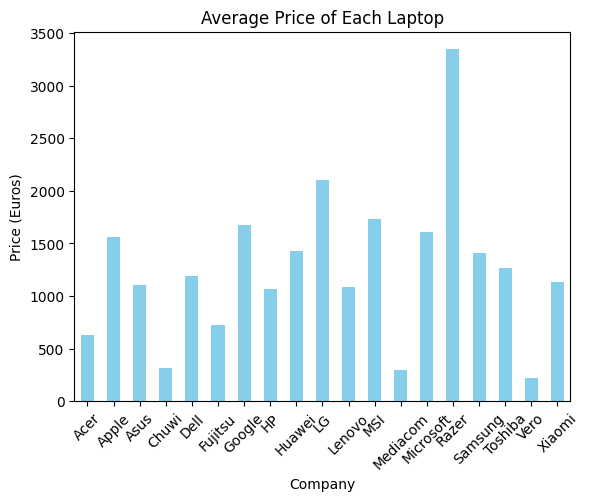

In [19]:
df.groupby('Company')['Price_euros'].mean().plot(kind='bar', color='skyblue')

plt.title('Average Price of Each Laptop')
plt.ylabel('Price (Euros)')
plt.xlabel('Company')
plt.xticks(rotation=45)  # X-axis labels ko thoda rotate kar diya hai
plt.show()

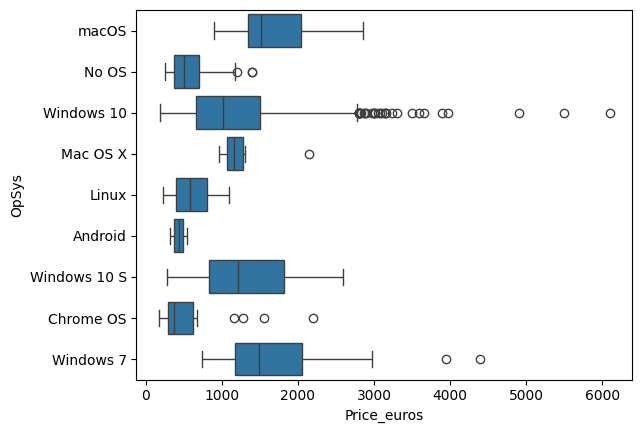

In [20]:
sns.boxplot(y='OpSys', x='Price_euros', data=df)
plt.show()


## Data Cleaning

In [21]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
dtype: object

In [22]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [25]:
df["Ram"]=df["Ram"].str.replace("GB","").astype("int")

In [ ]:
memory_df=df["Memory"]
for i in memory_df:
  for j in range(0,3):
    print()


128GB SSD 0
128GB SSD 1
128GB SSD 2
128GB Flash Storage 0
128GB Flash Storage 1
128GB Flash Storage 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
512GB SSD 0
512GB SSD 1
512GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
500GB HDD 0
500GB HDD 1
500GB HDD 2
256GB Flash Storage 0
256GB Flash Storage 1
256GB Flash Storage 2
256GB Flash Storage 0
256GB Flash Storage 1
256GB Flash Storage 2
512GB SSD 0
512GB SSD 1
512GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
500GB HDD 0
500GB HDD 1
500GB HDD 2
500GB HDD 0
500GB HDD 1
500GB HDD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
256GB SSD 0
256GB SSD 1
256GB SSD 2
512GB SSD 0
512GB SSD 1
512GB SSD 2
1TB HDD 0
1TB HDD 1
1TB HDD 2
128GB SSD 0
128GB SSD 1
128GB SSD 2
32GB Flash Storage 0
32GB Flash Storage 1
32GB Flash Storage 2
128GB SSD +  1TB HDD 0
128GB SSD +  1TB HDD 1
128GB SSD +  1TB HDD 2
500GB HDD 0
500GB HDD 1
500GB HDD 2
256GB SSD 0
256GB SSD 1
256G